# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Deryl Feyza
- **Email:** muhammadderylfeyza@gmail.com
- **ID Dicoding:** MS058D5Y0639

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh harga produk dengan volume penjualan produk pada tahun 2017?
- Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?

## Import Semua Packages/Library yang Digunakan

In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan data yang akan digunakan untuk analisis data. Data yang digunakan adalah data pemesanan E-Commerce yang dilakukan pada "Olist Store". Data ini dapat diunduh dari [Google Drive](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view).
Kode di bawah ini akan membaca data dari file CSV yang telah diunduh menjadi DataFrame nya masing masing.

In [2]:
order_details_df = pd.read_csv("./data/order_items_dataset.csv")
reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
orders_df = pd.read_csv("./data/orders_dataset.csv")
products_df = pd.read_csv("./data/products_dataset.csv")
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
order_pay_df = pd.read_csv("./data/order_payments_dataset.csv")
customers_df = pd.read_csv("./data/customers_dataset.csv")
category_df = pd.read_csv("./data/product_category_name_translation.csv")

Menggabungkan beberapa dataframe untuk mempermudah analisis

In [3]:

combined_df = pd.merge(
    left=orders_df,
    right=order_details_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=order_pay_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=sellers_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)

combined_df.head(10)


KeyboardInterrupt: 

In [4]:
combined_df.shape

(117329, 40)

**Insight:**
- Dataset memiliki total **117,329** baris dan **40** kolom.
- Tipe data bervariasi, terdiri dari 16 kolom Numerik `(int64, float64)` dan 24 kolom Kategorikal / Teks `(object)`.
- Dataset mencakup detail pesanan masing masing produk secara menyeluruh, variable nya meliputi:

  - **Informasi pelanggan**  
    - `customer_id`, `customer_unique_id`, `customer_city`, `customer_state`  

  - **Detail produk**  
    - `product_id`, `product_category_name`, `product_category_name_english`, `price`, `freight_value`  

  - **Informasi penjual**  
    - `seller_id`, `seller_city`, `seller_state`, `seller_zip_code_prefix`  

  - **Status dan waktu pesanan**  
    - `order_status`, `order_purchase_timestamp`, `order_approved_at`, `order_delivered_customer_date`, `order_estimated_delivery_date`  

  - **Detail transaksi**  
    - `payment_type`, `payment_sequential`, `payment_installments`, `payment_value`  

  - **Ulasan pelanggan**  
    - `review_score`, `review_comment_message`, `review_creation_date`  



### Assessing Data

Pada tahap ini, kita akan melihat struktur data, tipe data, dan statistik deskriptif dari dataset. Langkah-langkah yang akan dilakukan adalah:
- Melihat informasi dasar dataset.
- Melihat statistik deskriptif dari dataset.
- Melihat jumlah nilai yang hilang pada dataset.

In [5]:
#Informasi Dasar Dataset
combined_df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
combined_df.describe()

order_item_id          price  freight_value  payment_sequential  \
count  117329.000000  117329.000000  117329.000000       117329.000000   
mean        1.194121     120.524349      20.027514            1.094452   
std         0.684225     182.944843      15.828077            0.731174   
min         1.000000       0.850000       0.000000            1.000000   
25%         1.000000      39.900000      13.080000            1.000000   
50%         1.000000      74.900000      16.280000            1.000000   
75%         1.000000     134.900000      21.180000            1.000000   
max        21.000000    6735.000000     409.680000           29.000000   

       payment_installments  payment_value  customer_zip_code_prefix  \
count         117329.000000  117329.000000             117329.000000   
mean               2.940151     172.062565              35060.118112   
std                2.775370     265.388194              29849.496175   
min                0.000000       0.000000               1003.000000   
25%                1.000000      60.750000              11250.000000   
50%                2.000000     108.100000              24240.000000   
75%                4.000000     189.060000              58770.000000   
max               24.000000   13664.080000              99990.000000   

        review_score  product_name_lenght  product_description_lenght  \
count  117329.000000        115634.000000               115634.000000   
mean        4.031467            48.768018                  785.802861   
std         1.387927            10.033831                  652.382965   
min         1.000000             5.000000                    4.000000   
25%         4.000000            42.000000                  346.000000   
50%         5.000000            52.000000                  600.000000   
75%         5.000000            57.000000                  983.000000   
max         5.000000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count       115634.000000     117309.000000      117309.000000   
mean             2.205528       2110.763062          30.254456   
std              1.717783       3785.128931          16.177519   
min              1.000000          0.000000           7.000000   
25%              1.000000        300.000000          18.000000   
50%              1.000000        700.000000          25.000000   
75%              3.000000       1800.000000          38.000000   
max             20.000000      40425.000000         105.000000   

       product_height_cm  product_width_cm  seller_zip_code_prefix  
count      117309.000000     117309.000000           117329.000000  
mean           16.612476         23.071452            24450.781955  
std            13.452625         11.745875            27582.364358  
min             2.000000          6.000000             1001.000000  
25%             8.000000         15.000000             6429.000000  
50%            13.000000         20.000000            13660.000000  
75%            20.000000         30.000000            28035.000000  
max           105.000000        118.000000            99730.000000

In [7]:
# Menampilkan statistik deskriptif 
combined_df.describe(include='all')

order_id                       customer_id  \
count                             117329                            117329   
unique                             97916                             97916   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count        117329                   117329               117314   
unique            7                    97370                89533   
top       delivered      2017-08-08 20:26:31  2017-08-08 20:43:31   
freq         114859                       63                   63   
mean            NaN                      NaN                  NaN   
std             NaN                      NaN                  NaN   
min             NaN                      NaN                  NaN   
25%             NaN                      NaN                  NaN   
50%             NaN                      NaN                  NaN   
75%             NaN                      NaN                  NaN   
max             NaN                      NaN                  NaN   

       order_delivered_carrier_date order_delivered_customer_date  \
count                        116094                        114858   
unique                        80449                         95021   
top             2017-08-10 11:58:14           2017-08-14 12:46:18   
freq                             63                            63   
mean                            NaN                           NaN   
std                             NaN                           NaN   
min                             NaN                           NaN   
25%                             NaN                           NaN   
50%                             NaN                           NaN   
75%                             NaN                           NaN   
max                             NaN                           NaN   

       order_estimated_delivery_date  order_item_id  \
count                         117329  117329.000000   
unique                           449            NaN   
top              2017-12-20 00:00:00            NaN   
freq                             652            NaN   
mean                             NaN       1.194121   
std                              NaN       0.684225   
min                              NaN       1.000000   
25%                              NaN       1.000000   
50%                              NaN       1.000000   
75%                              NaN       1.000000   
max                              NaN      21.000000   

                              product_id  ... product_description_lenght  \
count                             117329  ...              115634.000000   
unique                             32789  ...                        NaN   
top     aca2eb7d00ea1a7b8ebd4e68314663af  ...                        NaN   
freq                                 533  ...                        NaN   
mean                                 NaN  ...                 785.802861   
std                                  NaN  ...                 652.382965   
min                                  NaN  ...                   4.000000   
25%                                  NaN  ...                 346.000000   
50%                                  NaN  ...                 600.000000   
75%             

In [10]:
#Menampilkan jumlah missing value per kolom
combined_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             103437


**Insight:**
- **Statistik Deskriptif:**
  - **Product:**
    - **product_name_lenght**: Rata-rata **48.768 Karakter** (min: **5**, maks: **76**).
    - **product_description_lenght**: Rata-rata **785.803 Karakter** (min: **4**, maks: **3992**).
    - **product_photos_qty**: Rata-rata **2.206 Foto** (min: **1**, maks: **20**).
    - **product_weight_g**: Rata-rata **2110.763 Gram** (min: **0**, maks: **40425**).
    - **product_length_cm**: Rata-rata **30.254 cm** (min: **7**, maks: **105**).
    - **product_height_cm**: Rata-rata **16.612 cm** (min: **2**, maks: **105**).
    - **product_width_cm**: Rata-rata **23.071 cm** (min: **6**, maks: **118**).

  - **Order:**
    - **order_item_id**: Rata-rata **1.194 Item per Pesanan** (min: **1**, maks: **21**).

  - **Price:**
    - **price**: Rata-rata **R$120.524** (min: **R$0.85**, maks: **R$6735**).

  - **Shipping:**
    - **freight_value**: Rata-rata **R$20.028** (min: **R$0** [gratis], maks: **R$409.68**).

  - **Payment:**
    - **payment_sequential**: Rata-rata **1.094 Metode Pembayaran** (min: **1**, maks: **29**).
    - **payment_installments**: Rata-rata **2.940 Cicilan** (min: **0** [lunas], maks: **24**).
    - **payment_value**: Rata-rata **R$172.063** (min: **R$0**, maks: **R$13,664.08**).

  - **Review:**
    - **review_score**: Rata-rata **4.031/5** (min: **1**, maks: **5**).
   

- **Nilai yang Hilang:**
    - **order_approved_at**: 15 pesanan yang pembayarannya belum di konfirmasi sistem
    - **review_comment_title**: 103437 pesanan dengan review_comment_title kosong
    - **order_delivered_carrier_date**: 1235 pesanan belum ada keterangan ditangani oleh logistik
    - **order_delivered_customer_date**: 2471 customer belum menerima pesanan
    - **product_category_name**: 1695 pesanan tanpa kategori produk yang jelas
    - **product_name_lenght**: 1695 pesanan tanpa panjang nama produk
    - **product_description_lenght**: 1695 pesanan tanpa panjang deskripsi produk
    - **product_photos_qty**: 1695 pesanan tanpa foto produk
    - **product_weight_g**: 20 produk tanpa informasi berat
    - **product_length_cm**: 20 produk tanpa informasi panjang
    - **product_height_cm**: 20 produk tanpa informasi tinggi
    - **product_width_cm**: 20 produk tanpa informasi lebar
    - **product_category_name_english**: 1720 produk tanpa kategori dalam bahasa Inggris

- **Potensi Outlier:**
    - **product_weight_g**: Dengan min value **0 gram**
    - **payment_value**: Dengan min value **R$0**

### Cleaning Data
Pada tahap ini, kita akan melakukan pembersihan data untuk memastikan kualitas data sebelum melakukan analisis lebih lanjut. Langkah-langkah yang akan dilakukan meliputi:

1. **Memastikan Kesesuaian Nama Kolom dan DataType tiap kolom:**
   - Menyesuaikan nama kolom dan tipe data yang kurang sesuai

2. **Menangani Nilai yang Hilang:**
   - Mengisi nilai yang hilang pada kolom numerik dengan median.
   - Mengisi nilai yang hilang pada kolom kategorikal atau teks dengan mode atau kategori khusus seperti `'Not Provided'`.
   - Menghapus baris dengan nilai yang hilang pada kolom kategorikal atau teks yang mengharuskan nilai harus terisi
 
3. **Menghapus Duplikasi:**
   - Memeriksa dan menghapus baris duplikat jika ada.

4. **Menghapus Kolom yang Tidak Diperlukan:**
   - Menghapus kolom yang tidak relevan untuk analisis.

4. **Menghapus Kolom yang Tidak Diperlukan:**
   - Menghapus kolom yang tidak relevan untuk analisis.

**Memastikan Kesesuaian Nama Kolom dan DataType tiap kolom** 

Kita akan mengganti semua kolom yang merepresentasikan tanggal menjadi DateTime dan menyesuaikan kesalahan pengetikan kolom "lenght" menjadi "length"


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [12]:
#Mengganti nama kolom typo product_name_lenght menjadi product_name_length 
combined_df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)
combined_df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

In [13]:

#mengganti semua kolom yang merepresentasikan tanggal menjadi DateTime
combined_df['order_approved_at'] = pd.to_datetime(combined_df['order_approved_at'])
combined_df['order_purchase_timestamp'] = pd.to_datetime(combined_df['order_purchase_timestamp'])
combined_df['order_delivered_customer_date'] = pd.to_datetime(combined_df['order_delivered_customer_date'])
combined_df['order_delivered_carrier_date'] = pd.to_datetime(combined_df['order_delivered_carrier_date'])
combined_df['order_estimated_delivery_date'] = pd.to_datetime(combined_df['order_estimated_delivery_date'])
combined_df['shipping_limit_date'] = pd.to_datetime(combined_df['shipping_limit_date'])
combined_df['review_creation_date'] = pd.to_datetime(combined_df['review_creation_date'])
combined_df['review_answer_timestamp'] = pd.to_datetime(combined_df['review_answer_timestamp'])

#tambah kolom untuk membantu filtering
combined_df['month'] = combined_df['order_approved_at'].dt.month                 
combined_df['year'] = combined_df['order_approved_at'].dt.year                  


In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

**Menangani Nilai yang Hilang** 

Kita akan menghapus produk dengan data wajib yang tidak lengkap, mengisi nilai teks opsional dengan "Not Provided" dan mengisi nilai numerik dengan median


In [15]:
#Menampilkan jumlah missing value per kolom sebelum ditangani
combined_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             103437


In [16]:
#menghapus produk dengan data wajib yang tidak lengkap
columns_to_drop = [
    'product_category_name', 'product_name_length', 'product_description_length',
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 
    'product_height_cm', 'product_width_cm', 'order_approved_at'
]
combined_df = combined_df.dropna(subset=columns_to_drop)


#Mengisi Nilai missing pada kolom review_comment_title, review_comment_message dan product_category_name_english menjadi "Not Provided"
combined_df['review_comment_message'] = combined_df['review_comment_message'].fillna('Not Provided')
combined_df['product_category_name_english'] = combined_df['product_category_name_english'].fillna('Not Provided')
combined_df['review_comment_title'] = combined_df['review_comment_title'].fillna('Not Provided')

In [17]:
#mengisi nilai numerik yang hilang dengan median
median_product_weight = combined_df[combined_df['product_weight_g'] != 0]['product_weight_g'].median()
median_payment_value = combined_df[combined_df['payment_value'] != 0]['payment_value'].median()
combined_df.loc[combined_df['product_weight_g'] == 0, 'product_weight_g'] = median_product_weight
combined_df.loc[combined_df['payment_value'] == 0, 'payment_value'] = median_payment_value

In [18]:
#Menampilkan jumlah missing value per kolom setelah ditangani
combined_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1197
order_delivered_customer_date    2402
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creat

In [19]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115619 entries, 0 to 117328
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115619 non-null  object        
 1   customer_id                    115619 non-null  object        
 2   order_status                   115619 non-null  object        
 3   order_purchase_timestamp       115619 non-null  datetime64[ns]
 4   order_approved_at              115619 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114422 non-null  datetime64[ns]
 6   order_delivered_customer_date  113217 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115619 non-null  datetime64[ns]
 8   order_item_id                  115619 non-null  int64         
 9   product_id                     115619 non-null  object        
 10  seller_id                      115619 non-null  object        
 11  shipp

**Menghapus Duplikasi**

Memeriksa dan menghapus baris duplikat jika ada

In [20]:
duplicate_count = combined_df.duplicated().sum()
print(f"\nJumlah duplikasi sebelum penghapusan: {duplicate_count}")

combined_df = combined_df.drop_duplicates()

duplicate_count_after = combined_df.duplicated().sum()
print(f"Jumlah duplikasi setelah penghapusan: {duplicate_count_after}")


Jumlah duplikasi sebelum penghapusan: 0
Jumlah duplikasi setelah penghapusan: 0


**Menghapus Kolom yang Tidak Diperlukan**

Menghapus kolom yang tidak relevan untuk analisis.

In [21]:
columns_to_drop = [
    'product_name_length',
    'product_description_length',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'shipping_limit_date',
    'review_answer_timestamp',
    'payment_sequential',                  
    'payment_type',                      
    'payment_installments',               
    'payment_value'  
]


In [22]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115619 entries, 0 to 117328
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115619 non-null  object        
 1   customer_id                    115619 non-null  object        
 2   order_status                   115619 non-null  object        
 3   order_purchase_timestamp       115619 non-null  datetime64[ns]
 4   order_approved_at              115619 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114422 non-null  datetime64[ns]
 6   order_delivered_customer_date  113217 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115619 non-null  datetime64[ns]
 8   order_item_id                  115619 non-null  int64         
 9   product_id                     115619 non-null  object        
 10  seller_id                      115619 non-null  object        
 11  shipp

**Insight:**
- **Memastikan Kesesuaian Nama Kolom dan DataType tiap kolom:**
  - Mengganti tipe data pada kolom  ``order_approved_at`` menjadi `datetime64` akan memudahkan kita untuk menyortir dataset berdasarkan tanggal dan waktu.
  - Menambahkan kolom `year` dan `month` untuk memudahkan filtering data.
  - Menyesuaikan kesalahan penulisan `lenght` menjadi `length` pada kolom `product_description_lenght` dan `product_name_lenght`
- **Penanganan Nilai yang Hilang:**
  - Setelah proses pembersihan data, **semua kolom** dalam dataset **tidak lagi memiliki nilai yang hilang**. Analisis selanjutnya tidak akan terpengaruh oleh kekurangan data.
  - **Metode Penanganan:**
      - Semua nilai yang hilang pada kolom numerik (`product_weight_g` dan `payment_value`) diisi dengan **median** masing-masing kolom. Penggunaan median efektif untuk mengurangi dampak outlier dan menjaga distribusi data tetap stabil.
      - Semua baris dengan nilai yang hilang pada kolom ( `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, `order_approved_at`) telah dihapus, Mengurangi total dataset dari **117329** menjadi **115619** baris.

- **Penghapusan Kolom Yang Tidak Diperlukan:**
  - Menghapus kolom yang tidak diperlukan saat EDA akan memudahkan proses menganalisis data nantinya

- **Penghapusan Duplikasi Data:**
  - Dataset **tidak** memiliki duplikasi data baik sebelum maupun setelah proses penghapusan.

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan **Exploratory Data Analysis (EDA)**. EDA akan difokuskan pada pertanyaan bisnis yang telah ditentukan:

- Bagaimana pengaruh harga produk dengan volume penjualan produk dalam tahun 2017?
- Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?


**Bagaimana pengaruh harga produk dengan volume penjualan produk dalam tahun 2017**

Langkah Analisis
  - Filter data untuk tahun 2017
  - Analisis Korelasi antara Harga dan Volume Penjualan
  - Visualisasi Hubungan antara Harga dan Volume Penjualan


In [23]:
combined_2017_df = combined_df[combined_df['year'] == 2017]

bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000]
labels = ["0-50", "50-100", "100-200", "200-500", "500-1000", "1000-5000", "5000-10000", "10000+"]
combined_2017_df.loc[:, "price_bin"] = pd.cut(combined_2017_df["price"], bins=bins, labels=labels, right=False)
combined_2017_sales_df = combined_2017_df.groupby("price_bin", observed=False).agg({
    "product_id": "nunique", 
    "order_item_id": "count",  
    'price': 'mean'
}).reset_index()
combined_2017_sales_df


C:\Users\deryl\AppData\Local\Temp\ipykernel_37392\864679712.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_2017_df.loc[:, "price_bin"] = pd.cut(combined_2017_df["price"], bins=bins, labels=labels, right=False)


price_bin  product_id  order_item_id        price
0        0-50        5887          18089    31.131956
1      50-100        4534          16209    74.903275
2     100-200        3993          11590   144.209716
3     200-500        2063           5064   294.372129
4    500-1000         515           1079   695.098804
5   1000-5000         200            407  1545.228673
6  5000-10000           2              2  6617.000000
7      10000+           0              0          NaN

Correlation between price and sold volume: -0.5794985607259293


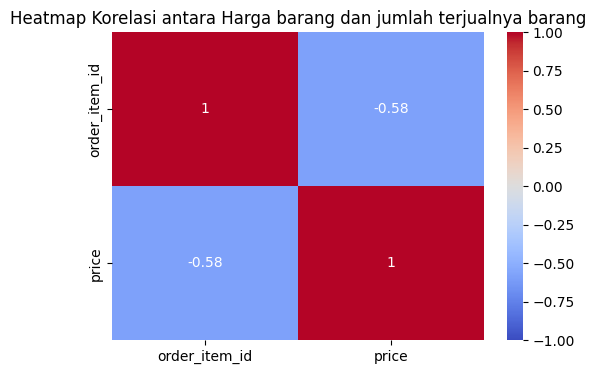

In [24]:
correlation_price_volume = combined_2017_sales_df['price'].corr(combined_2017_sales_df['order_item_id'])
print(f"Correlation between price and sold volume: {correlation_price_volume}")



# Plot heatmap for price and solf volume correlation
plt.figure(figsize=(6, 4))
corr_matrix = combined_2017_sales_df[['order_item_id', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Harga barang dan jumlah terjualnya barang')
plt.show()


C:\Users\deryl\AppData\Local\Temp\ipykernel_37392\2263740595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price_bin", y="order_item_id", data=combined_2017_sales_df, palette="Blues_r")


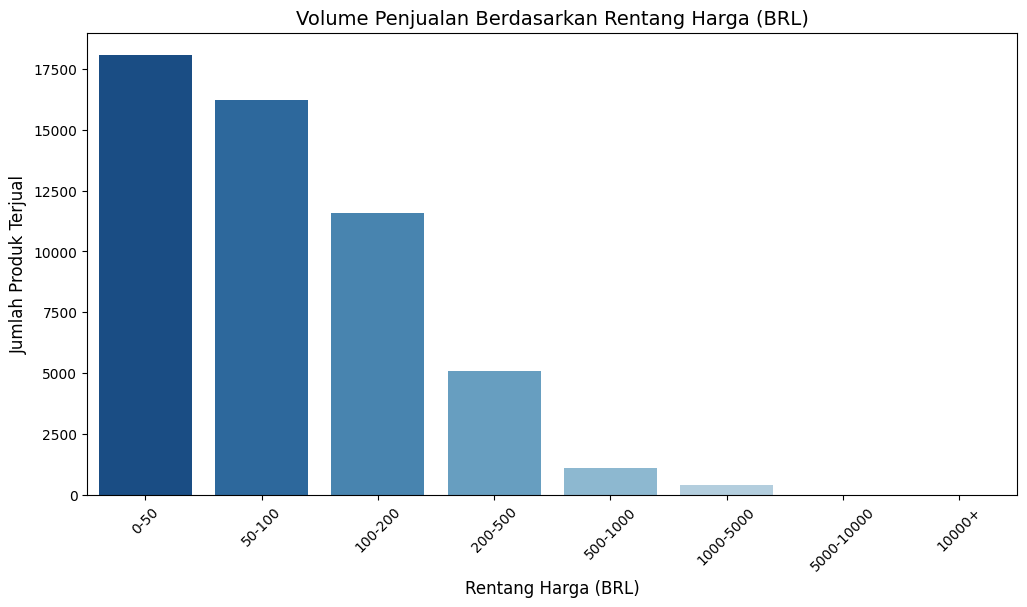

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x="price_bin", y="order_item_id", data=combined_2017_sales_df, palette="Blues_r")
plt.title("Volume Penjualan Berdasarkan Rentang Harga (BRL)", fontsize=14)
plt.xlabel("Rentang Harga (BRL)", fontsize=12)
plt.ylabel("Jumlah Produk Terjual", fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?**

Langkah Analisis
  - Merge dataset yang sudah ada dengan dataset geolocation
  - Filter data untuk tahun 2017
  - Visualisasi hubungan penjualan item dengan kota pelanggan 



In [26]:
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

geo_group = geolocation_df.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

combined_df = combined_df.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
combined_df = combined_df.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
combined_df.drop_duplicates(inplace=True)

combined_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   
3                    2018-08-13              1   
4                    2018-09-04              1   

                         product_id  ...    year  id  sigla       nome  \
0  87285b34884572647811a353c7ac498a  ...  2017.0  35     SP  São Paulo   
1  87285b34884572647811a353c7ac498a  ...  2017.0  35     SP  São Paulo   
2  87285b34884572647811a353c7ac498a  ...  2017.0  35     SP  São Paulo   
3  595fac2a385ac33a80bd5114aec74eb8  ...  2018.0  29     BA      Bahia   
4  aa4383b373c6aca5d8797843e5594415  ...  2018.0  52     GO      Goiás   

    nome_regiao geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0       Sudeste                      3149.0       -23.583885       -46.587473   
1       Sudeste                      3149.0       -23.583885       -46.587473   
2       Sudeste                      3149.0       -23.583885       -46.587473   
3      Nordeste                     47813.0       -12.945892       -45.016313   
4  Centro-Oeste                     75265.0       -16.752735       -48.522139   

  geolocation_city  geolocation_state  
0        sao paulo                 SP  
1        sao paulo                 SP  
2        sao paulo                 SP  
3        barreiras                 BA  
4       vianopolis                 GO  

[5 rows x 51 columns]

In [27]:
# Filter geolocation data to ensure it's within Brazil
valid_latitude_range = (-33.75, 5.3)  
valid_longitude_range = (-73.98, -34.79) 

combined_df = combined_df[
    (combined_df['geolocation_lat'] >= valid_latitude_range[0]) & 
    (combined_df['geolocation_lat'] <= valid_latitude_range[1]) &
    (combined_df['geolocation_lng'] >= valid_longitude_range[0]) &
    (combined_df['geolocation_lng'] <= valid_longitude_range[1])
]


In [28]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115273 entries, 0 to 115618
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115273 non-null  object        
 1   customer_id                    115273 non-null  object        
 2   order_status                   115273 non-null  object        
 3   order_purchase_timestamp       115273 non-null  datetime64[ns]
 4   order_approved_at              115273 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114083 non-null  datetime64[ns]
 6   order_delivered_customer_date  112884 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115273 non-null  datetime64[ns]
 8   order_item_id                  115273 non-null  int64         
 9   product_id                     115273 non-null  object        
 10  seller_id                      115273 non-null  object        
 11  shipp

In [29]:
combined_2017_df = combined_df[combined_df['year'] == 2017]
combined_2017_df.shape

(52288, 51)

C:\Users\deryl\AppData\Local\Temp\ipykernel_37392\4203779127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


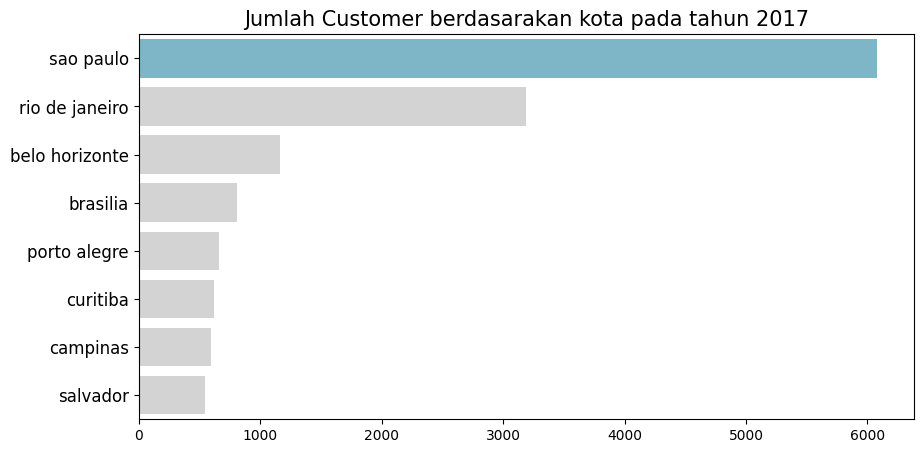

In [30]:
by_city = combined_2017_df.groupby("geolocation_city")["order_id"].nunique().reset_index()
by_city.rename(columns={"order_id": "customer_count"}, inplace=True)
by_city_sorted = by_city.sort_values(by="customer_count", ascending=False).head(8)
colors_ = ["#72BCD4"] + ["#D3D3D3"] * (len(by_city_sorted) - 1)
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count", 
    y="geolocation_city",
    data=by_city_sorted,
    palette=colors_
)
plt.title("Jumlah Customer berdasarakan kota pada tahun 2017", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


C:\Users\deryl\AppData\Local\Temp\ipykernel_37392\778749251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


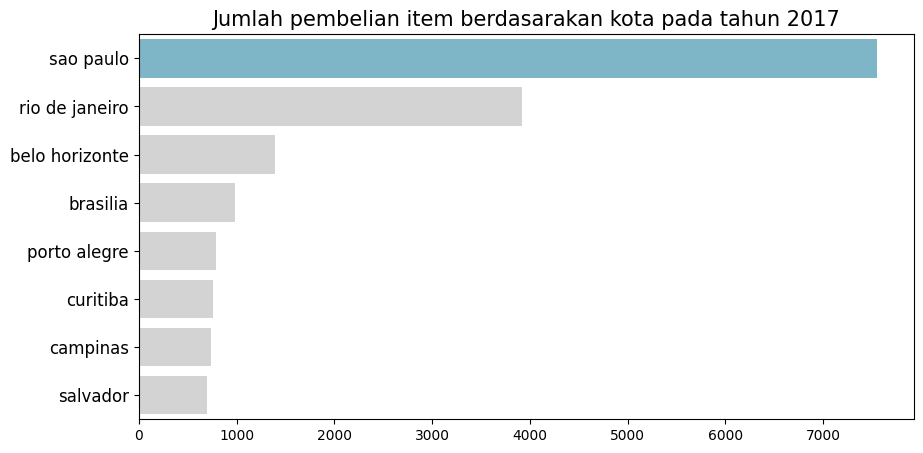

In [31]:
by_city = combined_2017_df.groupby("geolocation_city")["order_id"].count().reset_index()
by_city.rename(columns={"order_id": "customer_count"}, inplace=True)
by_city_sorted = by_city.sort_values(by="customer_count", ascending=False).head(8)
colors_ = ["#72BCD4"] + ["#D3D3D3"] * (len(by_city_sorted) - 1)
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count", 
    y="geolocation_city",
    data=by_city_sorted,
    palette=colors_
)
plt.title("Jumlah pembelian item berdasarakan kota pada tahun 2017", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [32]:
lats = list(combined_2017_df['geolocation_lat'].dropna().values)
longs = list(combined_2017_df['geolocation_lng'].dropna().values)
locations = list(zip(lats, longs))
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)
FastMarkerCluster(data=locations).add_to(map1)

map1

**Insight:**
- **Bagaimana pengaruh harga produk dengan volume penjualan produk pada tahun 2017?**
    - terlihat bahwa terdapat hubungan negatif moderat antara harga produk dan volume penjualan produk. Korelasi antara harga dan volume penjualan adalah -0.58, yang menunjukkan bahwa peningkatan harga cenderung mengurangi volume penjualan produk pada tahun 2017.
- **Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?**
    - São Paulo muncul sebagai kota dengan jumlah pembelian terbanyak, yang mengindikasikan bahwa kota ini memiliki jumlah pelanggan yang besar dan aktivitas belanja yang lebih tinggi dibandingkan dengan kota-kota lainnya. Hal ini bisa dipengaruhi oleh faktor seperti populasi yang besar, ekonomi yang kuat, dan akses lebih mudah ke berbagai produk dan layanan.
Rio de Janeiro, meskipun tidak sebesar São Paulo, juga mencatatkan jumlah pembelian yang signifikan, menunjukkan bahwa kota ini juga memiliki pangsa pasar yang besar dalam hal konsumsi e-commerce.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh harga produk dengan volume penjualan produk dalam tahun 2017?

C:\Users\deryl\AppData\Local\Temp\ipykernel_37392\2263740595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price_bin", y="order_item_id", data=combined_2017_sales_df, palette="Blues_r")


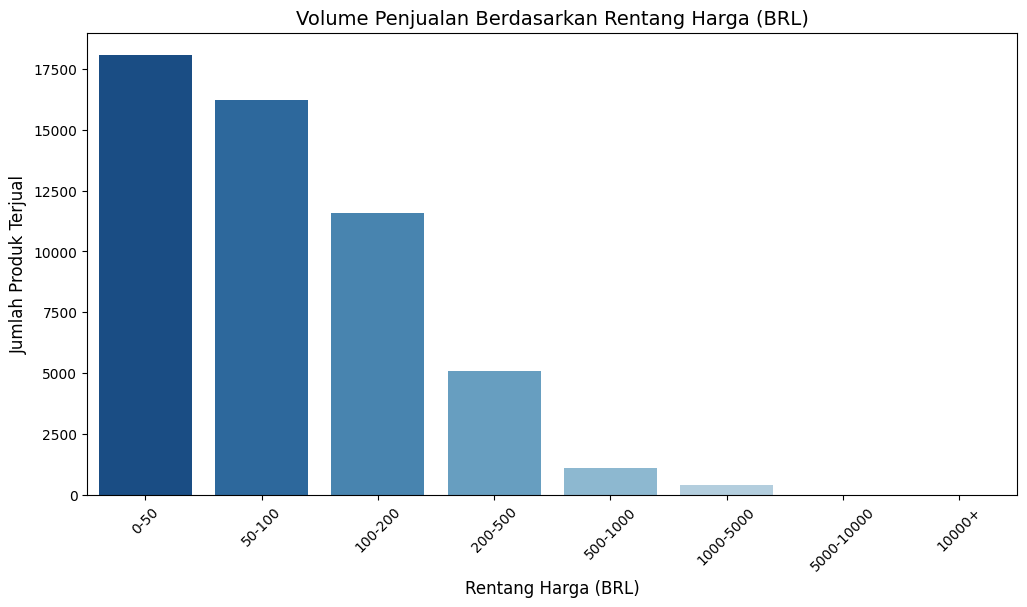

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="price_bin", y="order_item_id", data=combined_2017_sales_df, palette="Blues_r")
plt.title("Volume Penjualan Berdasarkan Rentang Harga (BRL)", fontsize=14)
plt.xlabel("Rentang Harga (BRL)", fontsize=12)
plt.ylabel("Jumlah Produk Terjual", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?

In [34]:
lats = list(combined_2017_df['geolocation_lat'].dropna().values)
longs = list(combined_2017_df['geolocation_lng'].dropna().values)
locations = list(zip(lats, longs))
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)
FastMarkerCluster(data=locations).add_to(map1)

map1

**Insight:**

**Pengaruh Harga produk dengan volume pembelian produk**
- harga yang lebih rendah berhubungan dengan volume penjualan yang lebih tinggi, sementara harga yang lebih tinggi mengarah pada volume penjualan yang lebih rendah. Ini mencerminkan pola umum dalam e-commerce, di mana produk dengan harga lebih rendah cenderung lebih terjangkau dan lebih diminati oleh konsumen, sedangkan produk dengan harga tinggi mungkin lebih terbatas dalam permintaan karena faktor harga yang lebih tinggi.

**Kota dengan pembelian terbanyak**
- Produk dengan distribusi tertinggi terletak di wilayah Tenggara dan Selatan Brasil, yang merupakan daerah dengan kepadatan penduduk terbesar. Misalnya, wilayah Tenggara, khususnya São Paulo, memiliki populasi sekitar 12 juta penduduk.

## Conclusion

## Bagaimana pengaruh harga produk dengan volume penjualan produk dalam tahun 2017?
- harga yang lebih rendah berhubungan dengan volume penjualan yang lebih tinggi, sementara harga yang lebih tinggi mengarah pada volume penjualan yang lebih rendah. Ini mencerminkan pola umum dalam e-commerce, di mana produk dengan harga lebih rendah cenderung lebih terjangkau dan lebih diminati oleh konsumen, sedangkan produk dengan harga tinggi mungkin lebih terbatas dalam permintaan karena faktor harga yang lebih tinggi. Namun, meskipun harga berperan penting dalam menentukan volume penjualan, faktor-faktor lain seperti kualitas produk, kategori produk, serta strategi pemasaran juga turut memengaruhi hasil ini.

## Wilayah mana yang melakukan pembelian terbanyak dalam tahun 2017?
- São Paulo muncul sebagai kota dengan jumlah pembelian terbanyak, yang mengindikasikan bahwa kota ini memiliki jumlah pelanggan yang besar dan aktivitas belanja yang lebih tinggi dibandingkan dengan kota-kota lainnya. Hal ini bisa dipengaruhi oleh faktor seperti populasi yang besar, ekonomi yang kuat, dan akses lebih mudah ke berbagai produk dan layanan.